<a href="https://colab.research.google.com/github/bara080/TradCNN/blob/main/radar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Use Cuda

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

cuda:0


Define Path

In [ ]:
# PATH = '/content/drive/MyDrive/first/data'

try:
  %cd /content/drive/MyDrive/first/data

except FileNotFoundError:

    print("Directory not found. Please provide a valid path.")

/content/drive/MyDrive/first/data


In [ ]:
from torchvision import datasets

In [ ]:
# Define transformers with normalization

transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])



In [ ]:
import os

# Ensure that hidden files are ignored
def has_file_allowed_extension(filename, extensions):
    """Checks if a file is an allowed extension."""
    return filename.lower().endswith(extensions)

def make_dataset(directory, class_to_idx, extensions=None, is_valid_file=None):
    """Generates a list of samples of a form (sample, class_index)"""
    instances = []
    directory = os.path.expanduser(directory)
    both_none = extensions is None and is_valid_file is None
    if both_none:
        raise ValueError("Both extensions and is_valid_file cannot be None")

    if extensions is not None:
        def is_valid_file(x):
            return has_file_allowed_extension(x, extensions)

    for target_class in sorted(class_to_idx.keys()):
        class_index = class_to_idx[target_class]
        target_dir = os.path.join(directory, target_class)
        if not os.path.isdir(target_dir):
            continue
        for root, _, fnames in sorted(os.walk(target_dir, followlinks=True)):
            for fname in sorted(fnames):
                path = os.path.join(root, fname)
                if is_valid_file(path):
                    item = path, class_index
                    instances.append(item)

    return instances




In [ ]:


# Load the dataset
root = '/content/drive/MyDrive/first/data'
train_dataset_A = datasets.ImageFolder(root=root + '/UserA', transform=transform)
train_dataset_F = datasets.ImageFolder(root=root + '/UserF', transform=transform)
train_dataset_I = datasets.ImageFolder(root=root + '/UserI', transform=transform)

# Combine datasets
train_dataset = torch.utils.data.ConcatDataset([train_dataset_A, train_dataset_F, train_dataset_I])

# Load the test dataset
test_root = '/content/drive/MyDrive/first/test/UserF'
test_dataset = datasets.ImageFolder(root=test_root, transform=transform)

# Define DataLoader
batch_size = 32

# Trainloader
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# Testloader
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Define Classes
classes = ('ac', 'alarm', 'bedroom', 'calendar', 'camera', 'cancel', 'day', 'dim', 'direction', 'door',
           'email', 'food', 'goodmorning', 'heat', 'house', 'kitchen', 'lightbulb', 'list',
           'lock', 'message', 'movie', 'night', 'order', 'phone', 'picture', 'place',
           'rain', 'raise', 'restaurant', 'room', 'schedule', 'shopping', 'snow', 'sunny',
           'temperature', 'time', 'traffic', 'turndown', 'turnoff', 'turnon', 'wakeup', 'weather')


# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

In [ ]:
# Ensure the number of classes matches the output layer of the model
# assert len(classes) == 41, f"Expected 41 classes, but got {len(classes)}."
print(len(classes))


42


Check the dataset loading

In [ ]:
import os

# Print the classes and their indices
print("Classes and their indices in the dataset:")
print(train_dataset_A.class_to_idx)

# Verify the labels in the dataset
print("Sample labels from the train dataset:")
for i in range(10):
    _, label = train_dataset_A[i]
    print(f"Label {i}: {label}")

# Check if there are any labels that are out of bounds
for i, data in enumerate(trainloader):
    inputs, labels = data
    if torch.any(labels >= len(classes)):
        print(f"Found out-of-bounds label at batch {i}: {labels}")
        break


Classes and their indices in the dataset:
{'ac': 0, 'alarm': 1, 'bedroom': 2, 'calendar': 3, 'camera': 4, 'cancel': 5, 'day': 6, 'dim': 7, 'direction': 8, 'door': 9, 'email': 10, 'food': 11, 'goodmorning': 12, 'heat': 13, 'house': 14, 'kitchen': 15, 'lightbulb': 16, 'list': 17, 'lock': 18, 'message': 19, 'movie': 20, 'night': 21, 'order': 22, 'phone': 23, 'picture': 24, 'place': 25, 'rain': 26, 'raise': 27, 'restauraunt': 28, 'room': 29, 'schedule': 30, 'shopping': 31, 'snow': 32, 'sunny': 33, 'temperature': 34, 'time': 35, 'traffic': 36, 'turndown': 37, 'turnoff': 38, 'turnon': 39, 'wakeup': 40, 'weather': 41}
Sample labels from the train dataset:
Label 0: 0
Label 1: 0
Label 2: 0
Label 3: 0
Label 4: 0
Label 5: 0
Label 6: 0
Label 7: 0
Label 8: 0
Label 9: 0


In [ ]:
print(f"Number of images in the dataset: {len(train_dataset)}")


# # Check the classes in the train dataset
# print("Classes in the train dataset:")
# for idx, class_name in enumerate(train_dataset_A.classes):
#     print(f"Class {idx}: {class_name}")

# # Check the classes in the test dataset
# print("Classes in the test dataset:")
# for idx, class_name in enumerate(test_dataset.classes):
#     print(f"Class {idx}: {class_name}")


# Print the classes and their indices
print("Classes and their indices in the dataset:")
print(train_dataset_A.class_to_idx)

# Verify the labels in the dataset
print("Sample labels from the train dataset:")
for i in range(10):
    _, label = train_dataset_A[i]
    print(f"Label {i}: {label}")


Number of images in the dataset: 2348
Classes and their indices in the dataset:
{'ac': 0, 'alarm': 1, 'bedroom': 2, 'calendar': 3, 'camera': 4, 'cancel': 5, 'day': 6, 'dim': 7, 'direction': 8, 'door': 9, 'email': 10, 'food': 11, 'goodmorning': 12, 'heat': 13, 'house': 14, 'kitchen': 15, 'lightbulb': 16, 'list': 17, 'lock': 18, 'message': 19, 'movie': 20, 'night': 21, 'order': 22, 'phone': 23, 'picture': 24, 'place': 25, 'rain': 26, 'raise': 27, 'restauraunt': 28, 'room': 29, 'schedule': 30, 'shopping': 31, 'snow': 32, 'sunny': 33, 'temperature': 34, 'time': 35, 'traffic': 36, 'turndown': 37, 'turnoff': 38, 'turnon': 39, 'wakeup': 40, 'weather': 41}
Sample labels from the train dataset:
Label 0: 0
Label 1: 0
Label 2: 0
Label 3: 0
Label 4: 0
Label 5: 0
Label 6: 0
Label 7: 0
Label 8: 0
Label 9: 0


In [ ]:
sample_image, sample_label = train_dataset[2]
print(f"Sample image shape: {sample_image.shape}, Sample label: {sample_label}")

Sample image shape: torch.Size([3, 128, 128]), Sample label: 0


In [ ]:
print(classes)

# total number of classes is 42

('ac', 'alarm', 'bedroom', 'calender', 'camera', 'cancel', 'day', 'dim', 'direction', 'door', 'email', 'food', 'goodmorning', 'heat', 'house', 'kitchen', 'lightbulb', 'list', 'lock', 'message', 'movie', 'night', 'order', 'phone', 'picture', 'place', 'rain', 'raise', 'restaurant', 'room', 'schedule', 'shopping', 'snow', 'sunny', 'temperature', 'time', 'traffic', 'turndown', 'turnoff', 'wakeup', 'weather')


In [ ]:
import matplotlib.pyplot as plt

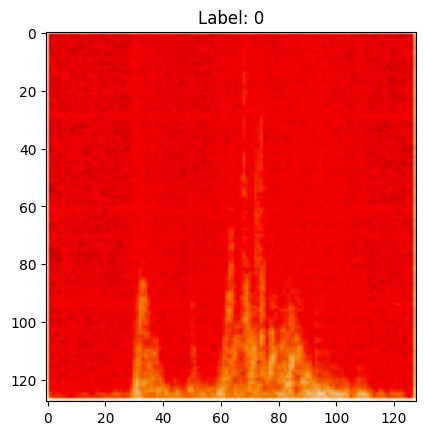

In [ ]:
plt.imshow(sample_image.permute(1, 2, 0))
plt.title(f"Label: {sample_label}")
plt.show()

In [ ]:
# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

Define the netork

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class TraditionalNet(nn.Module):
    def __init__(self):
        super().__init__()
        super(TraditionalNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1)
        self.fc1 = nn.Linear(128 * 14 * 14, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 42)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Initialize the network
model = TraditionalNet()

Test images and Labels

In [ ]:
# Define Criterion and Optimizer


criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [ ]:
print(model)

TraditionalNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=25088, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=42, bias=True)
)


In [ ]:
# Print the classes and their indices
print("Classes and their indices in the dataset:")
print(train_dataset_A.class_to_idx)

# Verify the labels in the dataset
print("Sample labels from the train dataset:")
for i in range(10):
    _, label = train_dataset_A[i]
    print(f"Label {i}: {label}")

# Check if there are any labels that are out of bounds
out_of_bounds = False
for i, data in enumerate(trainloader):
    inputs, labels = data
    if torch.any(labels >= len(classes)):
        print(f"Found out-of-bounds label at batch {i}: {labels}")
        out_of_bounds = True
        break

if not out_of_bounds:
    print("No out-of-bounds labels found.")


Classes and their indices in the dataset:
{'ac': 0, 'alarm': 1, 'bedroom': 2, 'calendar': 3, 'camera': 4, 'cancel': 5, 'day': 6, 'dim': 7, 'direction': 8, 'door': 9, 'email': 10, 'food': 11, 'goodmorning': 12, 'heat': 13, 'house': 14, 'kitchen': 15, 'lightbulb': 16, 'list': 17, 'lock': 18, 'message': 19, 'movie': 20, 'night': 21, 'order': 22, 'phone': 23, 'picture': 24, 'place': 25, 'rain': 26, 'raise': 27, 'restauraunt': 28, 'room': 29, 'schedule': 30, 'shopping': 31, 'snow': 32, 'sunny': 33, 'temperature': 34, 'time': 35, 'traffic': 36, 'turndown': 37, 'turnoff': 38, 'turnon': 39, 'wakeup': 40, 'weather': 41}
Sample labels from the train dataset:
Label 0: 0
Label 1: 0
Label 2: 0
Label 3: 0
Label 4: 0
Label 5: 0
Label 6: 0
Label 7: 0
Label 8: 0
Label 9: 0
No out-of-bounds labels found.


In [ ]:
# Define Classes
classes = ('ac', 'alarm', 'bedroom', 'calendar', 'camera', 'cancel', 'day', 'dim', 'direction', 'door',
           'email', 'food', 'goodmorning', 'heat', 'house', 'kitchen', 'lightbulb', 'list',
           'lock', 'message', 'movie', 'night', 'order', 'phone', 'picture', 'place',
           'rain', 'raise', 'restauraunt', 'room', 'schedule', 'shopping', 'snow', 'sunny',
           'temperature', 'time', 'traffic', 'turndown', 'turnoff', 'turnon', 'wakeup', 'weather')

# Ensure the number of classes matches the output layer of the model
assert len(classes) == 41, f"Expected 41 classes, but got {len(classes)}."


AssertionError: Expected 41 classes, but got 42.

In [ ]:
# Training the network
num_epochs = 10
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # Debugging: Print labels to check for out-of-bounds indices
        if torch.any(labels >= len(classes)):
            print(f"Found out-of-bounds label at epoch {epoch}, batch {i}: {labels}")
            break

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print(f'[Epoch {epoch + 1}, Mini-batch {i + 1}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')


Finished Training



PRINT THE MODEL



In [ ]:
# Save Model

torch.save(model.state_dict(), 'model.pth')
print('Model saved to model.pth')

Model saved to model.pth


In [ ]:
# Load the saved state dictionary
model.load_state_dict(torch.load('model.pth'))
print('Model loaded from model.pth')

# Set the model to evaluation mode
model.eval()

# # Get some random training images
# dataiter = iter(trainloader)  # Create an iterator from the trainloader
# images, labels = next(dataiter)  # Get the next batch of images and labels

# # Show images
# imshow(torchvision.utils.make_grid(images))

# # Print labels
# print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Model loaded from model.pth


TraditionalNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=25088, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=42, bias=True)
)